## Model v0.1

In [9]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

In [10]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

In [11]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/Shantanu/Downloads


In [12]:
# Uses the input file generated from preprocessing
input_file ='input_model_weighted_average.csv'

input_data = pd.read_csv(input_file)

# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)


# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('UNNAMED: 0.1', axis=1)

input_data.head()

# List of column names
col_names = list(input_data)


p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]
# List all column types
#input_data.dtypes

,Year,Period,Value
168,2000,JAN,1.97
169,2000,FEB,2.03
170,2000,MAY,2.20
171,2000,JUN,1.89


In [13]:
len(price_updated)

370

In [14]:
# Preprocessing

print("Shape of Original data: {}".format(input_data.shape) + "\n")

input_variables = input_data.iloc[:,3:]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_variables = sc.fit_transform(input_variables)

price = price_updated["Value"]

Shape of Original data: (370, 25)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM'],
      dtype='object')

Shape of variable data: (370, 22)



In [15]:
print(input_data.columns)

Index(['UNNAMED: 0', 'YEAR', 'MONTH', 'TMP_HIGH', 'TMP_AVG', 'TMP_LOW',
       'DP_HIGH', 'DP_AVG', 'DP_LOW', 'HUM_HIGH', 'HUM_AVG', 'HUM_LOW',
       'SEALVL_HIGH', 'SEALVL_AVG', 'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG',
       'VIS_LOW', 'WIND_HIGH', 'WIND_AVG', 'PRECIP', 'NUMDAY_RAIN',
       'NUM_DAYS_SNOW', 'NUM_DAYS_FOG', 'NUM_DAYS_THNDRSTRM'],
      dtype='object')


In [16]:
#Applying KernelPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 3, kernel = 'rbf')
input_variables = kpca.fit_transform(input_variables)




## Multiple Linear Regression

In [17]:
# #Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor_MLR = LinearRegression()
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_MLR.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_MLR.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of MLR: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("MLR")

Accuracy of MLR: 0.0822805165202


## Ridge Regression

In [18]:
# Coefficients should be close to zero

from sklearn.linear_model import Ridge
regressor_ridge = Ridge()
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_ridge.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_ridge.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Ridge: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Ridge")

Accuracy of Ridge: 0.0627269739081


In [19]:
# Try with some handpicked alpha values
# Note: Higher alpha decerease training test performance but increases generalization

regressor_ridge_01 = Ridge(alpha = 0.1)
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_ridge_01.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_ridge_01.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Ridge_0.1: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Ridge_0.1")

regressor_ridge_10 = Ridge(alpha = 10)
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_ridge_10.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_ridge_10.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Ridge_10: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Ridge_10")

Accuracy of Ridge_0.1: 0.077521314847
Accuracy of Ridge_10: 0.0774729231912


## Lasso Regression

In [20]:
# we have large number of features and only a few of them looked important
from sklearn.linear_model import Lasso
regressor_lasso = Lasso()
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_lasso.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_lasso.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Lasso: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Lasso")

Accuracy of Lasso: -0.0183814519674


In [21]:
# Setting alpha too low will remove the effect of regularization

regressor_lasso_0001 = Lasso(alpha=0.0001, max_iter=100000)

from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_lasso_0001.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_lasso_0001.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Lasso_0.001: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Lasso_0.001")

Accuracy of Lasso_0.001: 0.0811613260368


## Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet
regressor_en = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000)


from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_en.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_en.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Elastic Net: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Elastic Net")

Accuracy of Elastic Net: 0.0334005935044


## Decision Tree

In [23]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
from sklearn.metrics import r2_score
number_of_trial = 3000
model_scores = []


for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_dt.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_dt.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Decision Tree: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Decision Tree")

Accuracy of Decision Tree: -0.617304659437


## Random Forest

In [24]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf10 = RandomForestRegressor(n_estimators = 10, random_state = 0)
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_rf10.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_rf10.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Random Forrest_10: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Random Forest_10")

Accuracy of Random Forrest_10: -0.0220506550144


In [25]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf100 = RandomForestRegressor(n_estimators = 100, random_state = 0)

from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_rf100.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_rf100.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Random Forrest_100: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Random Forest_100")

Accuracy of Random Forrest_100: -0.0114738491176


In [26]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
from sklearn.metrics import r2_score
number_of_trial = 30
model_scores = []
for i in range(number_of_trial):
    X_train, X_test, y_train, y_test = train_test_split(input_variables, price, test_size=0.2)
    regressor_rf300.fit(X_train, y_train)

    # Predicting a new result
    y_pred = regressor_rf300.predict(X_test)
    model_scores.append(r2_score(y_test,y_pred))


# Store Result and Model Name

print("Accuracy of Random Forrest_300: " + str(sum(model_scores)/number_of_trial))

model_results.append(sum(model_scores)/number_of_trial)
model_name.append("Random Forest_300")

Accuracy of Random Forrest_300: 0.0437621101518


### Plot Results of regression models

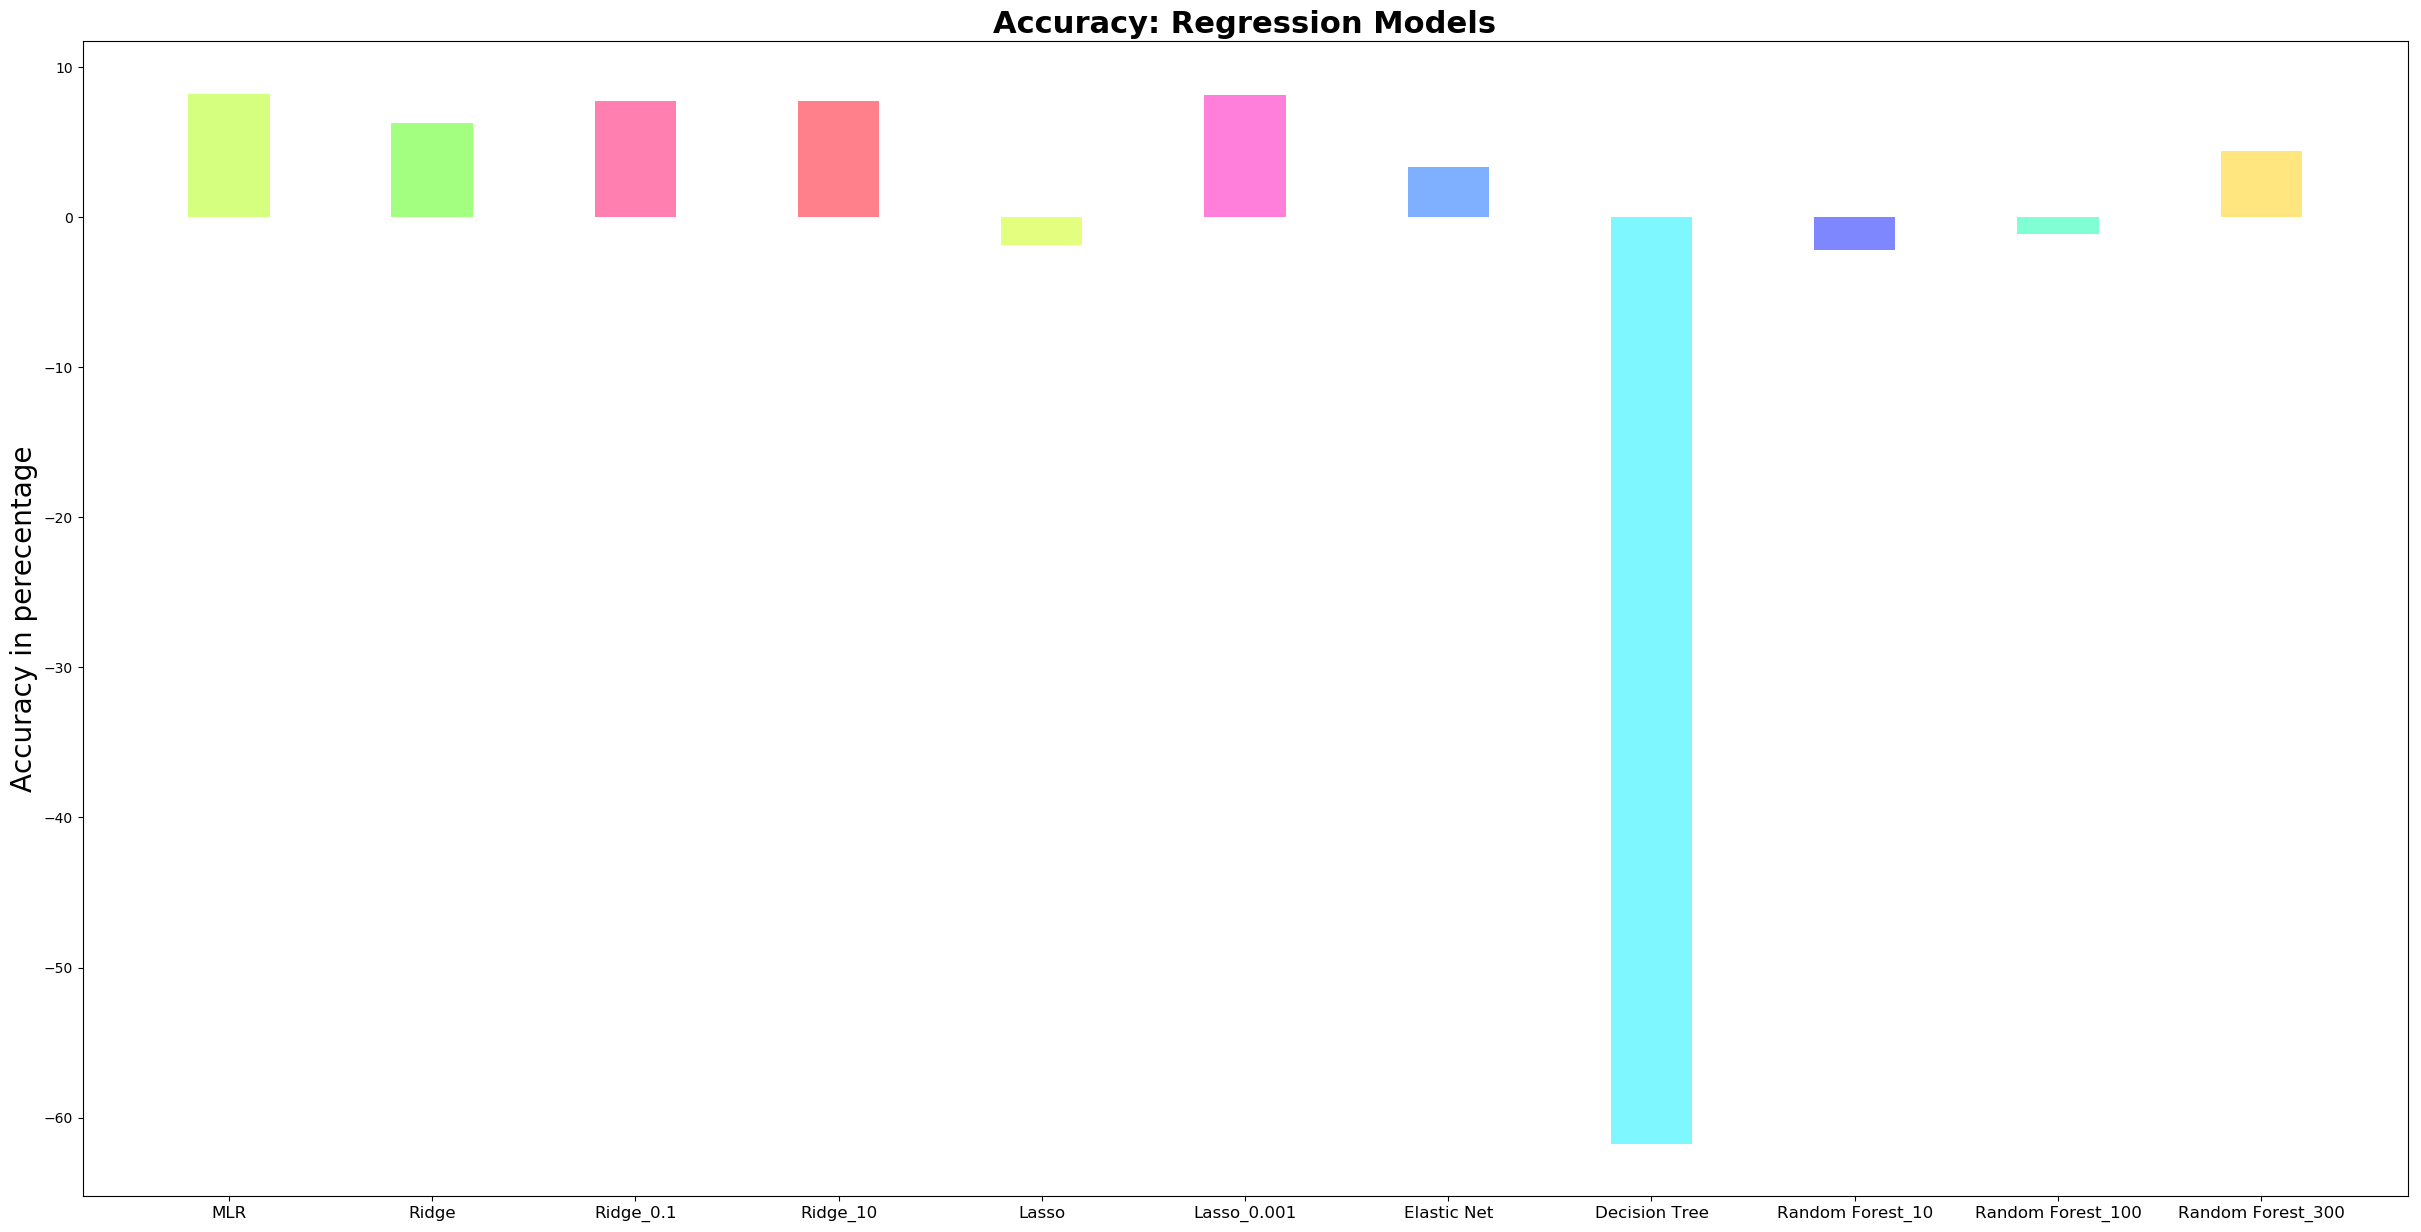

In [27]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.4, color = colors)
plt.xticks(y_pos, model_name, fontsize = 12)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Regression Models', fontsize=22, fontweight='bold')
plt.show()